In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
def filter(x):
    if x<=30000:
        return 'risky'
    else:
        return 'good'

In [4]:
#df['risk'] = df['Taxable.Income'].copy()
df['risk'] = df['Taxable.Income'].apply(filter)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,risk
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   risk             600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [6]:
df['risk'].value_counts()

risk
good     476
risky    124
Name: count, dtype: int64

In [7]:
from sklearn import preprocessing

In [8]:
label_encoder= preprocessing.LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['risk'] = label_encoder.fit_transform(df['risk'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,risk
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   risk             600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

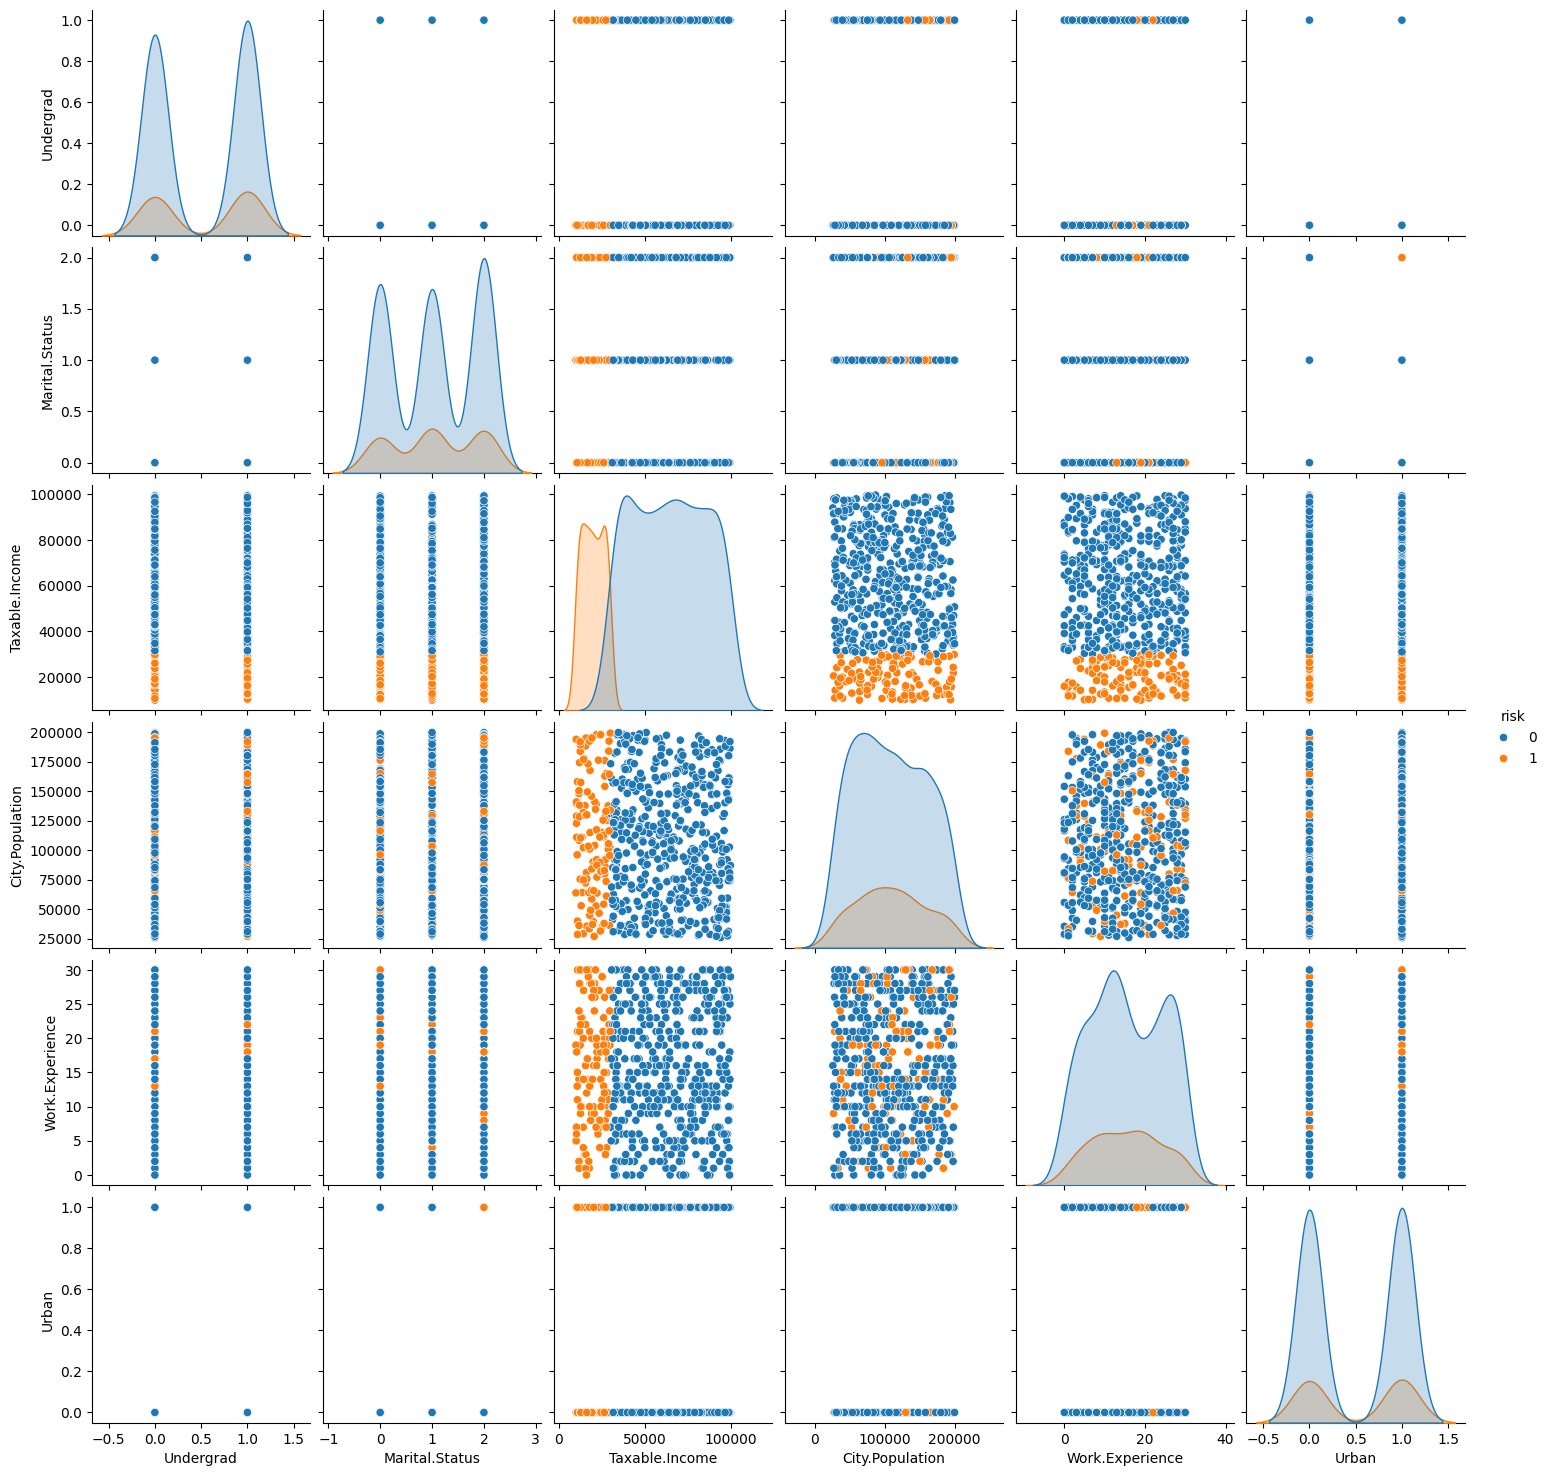

In [11]:
sns.pairplot(df, hue='risk')

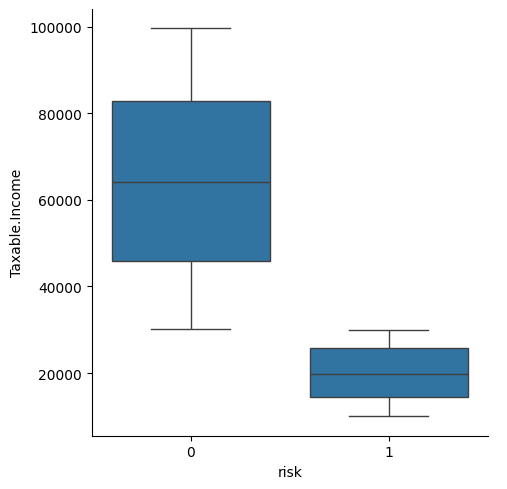

In [12]:
sns.catplot(data=df, x='risk', y='Taxable.Income', kind='box')

In [13]:
# Feature Engineering

In [14]:
# Train Test  Split

In [15]:
X = df.iloc[:, :-1]
y = df['risk']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
base_pred = model.predict(X_test)
base_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [19]:
#Evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
cm = confusion_matrix(y_test, base_pred, labels=model.classes_)

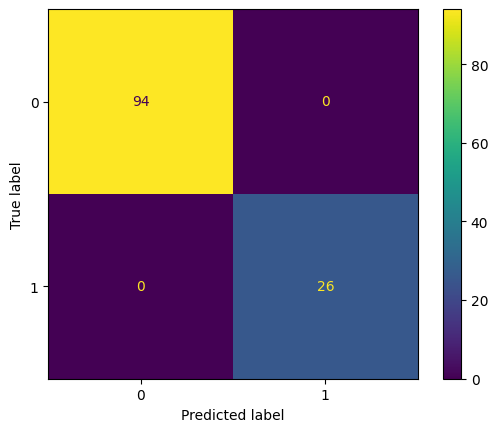

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [23]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [24]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [25]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])
# Tree is based on Taxable.Income 

,Feature Importance
Undergrad,0.0
Marital.Status,0.0
Taxable.Income,1.0
City.Population,0.0
Work.Experience,0.0
Urban,0.0


In [26]:
# Visualizing the Tree

In [27]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'Taxable.Income <= 30041.5\ngini = 0.325\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 382\nvalue = [382, 0]')]

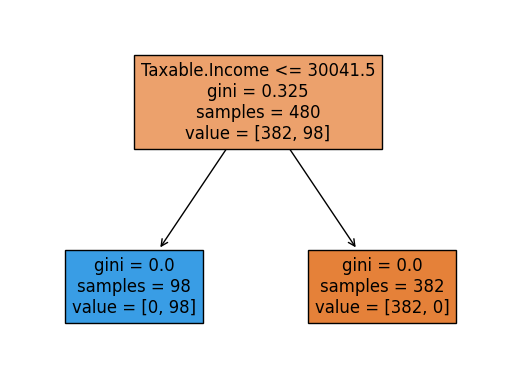

In [42]:
plot_tree(model, filled=True, feature_names=X.columns)

In [29]:
#Reporting model results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120





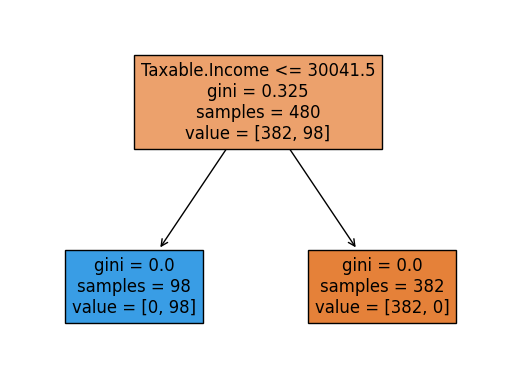

In [41]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plot_tree(model,filled=True,feature_names=X.columns)

report_model(model)

In [43]:
# HyperParameter Tuning

In [47]:
# use max depth
model_tree_depth = DecisionTreeClassifier(max_depth=2)
model_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120





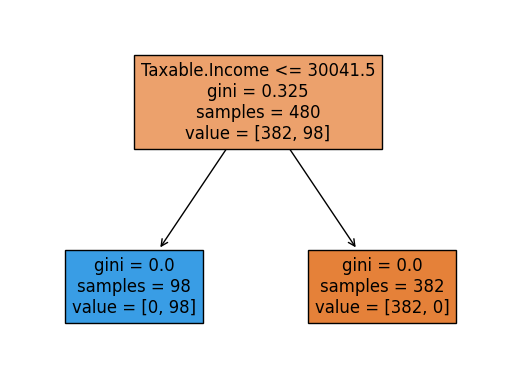

In [48]:
report_model(model_tree_depth)

In [46]:
# model is having only 1 depth

In [50]:
# use max leaf nodes
model_tree_leaf = DecisionTreeClassifier(max_leaf_nodes=2)
model_tree_leaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120





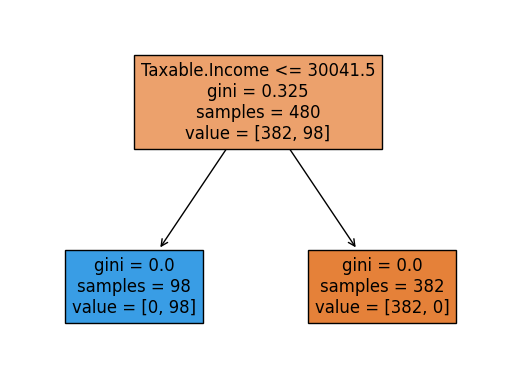

In [51]:
report_model(model_tree_leaf)

In [52]:
# as tree has only 1 depth, result is same

In [53]:
# Experiment with criteria
model_tree_entropy = DecisionTreeClassifier(criterion='entropy')
model_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120





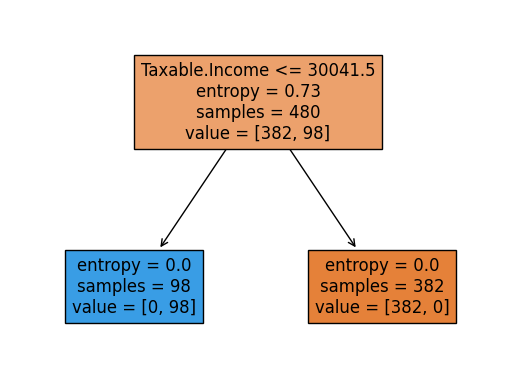

In [54]:
report_model(model_tree_entropy)

In [55]:
# Decision Tree Regressor

#Default Parameters

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

In [59]:
dtr_y_pred = dtr.predict(X_test)
dtr_y_pred

array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1.])

In [61]:
confusion_matrix(y_test, dtr_y_pred)

array([[94,  0],
       [ 0, 26]], dtype=int64)

In [62]:
print(classification_report(y_test, dtr_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

